# Project 1 - Human Activity Recognition
 
 ##### Project done in the course CM2007 by Beatriz Figueiredo

## Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Load MHEALTH Dataset

In [4]:
# Data in MHEALTHDATASET downloaded from UCI Machine Learning Repository: 
# https://archive.ics.uci.edu/dataset/319/mhealth+dataset
combined_df = pd.DataFrame()

In [6]:
# Loop through and add all 10 subjects' sensor data to dataframe
for i in range(1, 11):
    df = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
    # Note: Excluding the ECG data collected with the chest sensor
    df = df.loc[:, [0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]].rename(columns= {
        0: 'acc_ch_x', 
        1: 'acc_ch_y', 
        2: 'acc_ch_z', 
        5: 'acc_la_x', 
        6: 'acc_la_y', 
        7: 'acc_la_z', 
        8: 'gyr_la_x',
        9: 'gyr_la_y', 
        10: 'gyr_la_z', 
        11: 'mag_la_x', 
        12: 'mag_la_y', 
        13: 'mag_la_z', 
        14: 'acc_rw_x', 
        15: 'acc_rw_y',
        16: 'acc_rw_z', 
        17: 'gyr_rw_x', 
        18: 'gyr_rw_y', 
        19: 'gyr_rw_z', 
        20: 'mag_rw_x', 
        21: 'mag_rw_y', 
        22: 'mag_rw_z',
        23: 'activity'
    })
    df['subject'] = f'subject{i}'
    combined_df = pd.concat([combined_df, df])

In [7]:
combined_df.to_csv('mhealth_full.csv', index=False)

In [8]:
data = pd.read_csv('mhealth_full.csv')

In [9]:
data.shape

(1215745, 23)

In [10]:
data.head()

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0,subject1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 23 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   acc_ch_x  1215745 non-null  float64
 1   acc_ch_y  1215745 non-null  float64
 2   acc_ch_z  1215745 non-null  float64
 3   acc_la_x  1215745 non-null  float64
 4   acc_la_y  1215745 non-null  float64
 5   acc_la_z  1215745 non-null  float64
 6   gyr_la_x  1215745 non-null  float64
 7   gyr_la_y  1215745 non-null  float64
 8   gyr_la_z  1215745 non-null  float64
 9   mag_la_x  1215745 non-null  float64
 10  mag_la_y  1215745 non-null  float64
 11  mag_la_z  1215745 non-null  float64
 12  acc_rw_x  1215745 non-null  float64
 13  acc_rw_y  1215745 non-null  float64
 14  acc_rw_z  1215745 non-null  float64
 15  gyr_rw_x  1215745 non-null  float64
 16  gyr_rw_y  1215745 non-null  float64
 17  gyr_rw_z  1215745 non-null  float64
 18  mag_rw_x  1215745 non-null  float64
 19  mag_rw_y  1215745 non

###### No non-null data according to dataframe information. Dataset is in a good state

### Basic Data Cleaning

<Axes: xlabel='subject'>

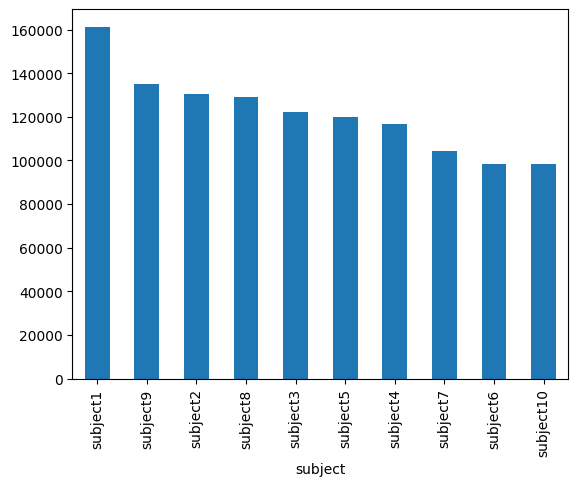

In [12]:
data.subject.value_counts().plot.bar()

###### The number of observations generated by each subject in the experiment seems fairly similar, making resampling potentially unnecessary.

In [13]:
data['activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

<Axes: xlabel='activity'>

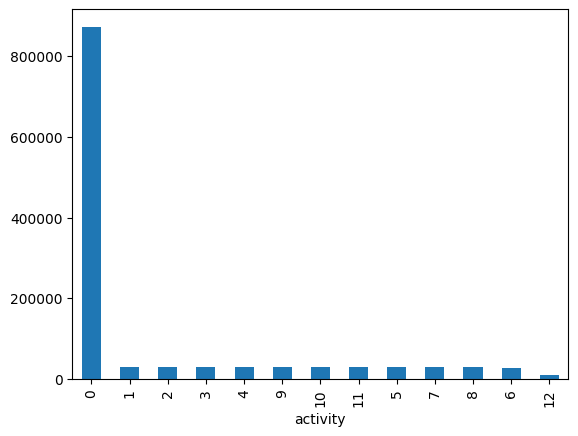

In [15]:
data['activity'].value_counts().plot.bar()

###### The data appears to be unbalanced in the 0 (null) category. Therefore, we will resample this category to create a more balanced dataset.